In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, ConfusionMatrixDisplay


In [3]:
df = pd.read_csv("../data/processed/thiroid_cancer_processed.csv")

In [4]:
df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Diagnostico
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,0
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,0
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,0
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,0
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,0
212687,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,0
212688,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,0
212689,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,0


In [5]:
df.head(1)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Diagnostico
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,0


In [6]:
df.head(1)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Diagnostico
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,0


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':  # Solo procesa columnas de tipo object
        df[col] = df[col].replace({'Yes': 1, 'No': 0})
dummies = pd.get_dummies(df[["Gender", "Ethnicity","Country"]], drop_first=True, dtype=int)
df.drop(columns=["Gender", "Ethnicity","Country"], inplace = True)
df = pd.concat([df, dummies], axis = 1)

C:\Users\dani0\AppData\Local\Temp\ipykernel_21640\2281608024.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


In [8]:
df.columns

Index(['Age', 'Country', 'Family_History', 'Radiation_Exposure',
       'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'TSH_Level',
       'T3_Level', 'T4_Level', 'Nodule_Size', 'Diagnostico', 'Gender_Male',
       'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Ethnicity_Hispanic',
       'Ethnicity_Middle Eastern', 'Country_China', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Nigeria', 'Country_Russia',
       'Country_South Korea', 'Country_UK', 'Country_USA'],
      dtype='object')

In [9]:
X = df[['Age', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
       'Smoking', 'Obesity', 'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level',
       'Nodule_Size','Gender_Male', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic',
       'Ethnicity_Middle Eastern','Country_China', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Nigeria', 'Country_Russia',
       'Country_South Korea', 'Country_UK', 'Country_USA']]
y = df["Diagnostico"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2517)

In [10]:
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
       'Smoking', 'Obesity', 'Diabetes','Gender_Male', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic',
       'Ethnicity_Middle Eastern','Country_China', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Nigeria', 'Country_Russia',
       'Country_South Korea', 'Country_UK', 'Country_USA'],)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [86]:
params={
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 11,
    'learning_rate': 0.1,
    'lambda_l2': 0.05,
    'n_estimators':100,
    'max_depth':4

}
num_round = 100
bst = lgb.train(params, train_data, num_round,
                valid_sets=[train_data, valid_data])

[LightGBM] [Info] Number of positive: 39597, number of negative: 130555
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 170152, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.232715 -> initscore=-1.193041
[LightGBM] [Info] Start training from score -1.193041


In [87]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8283222454688639


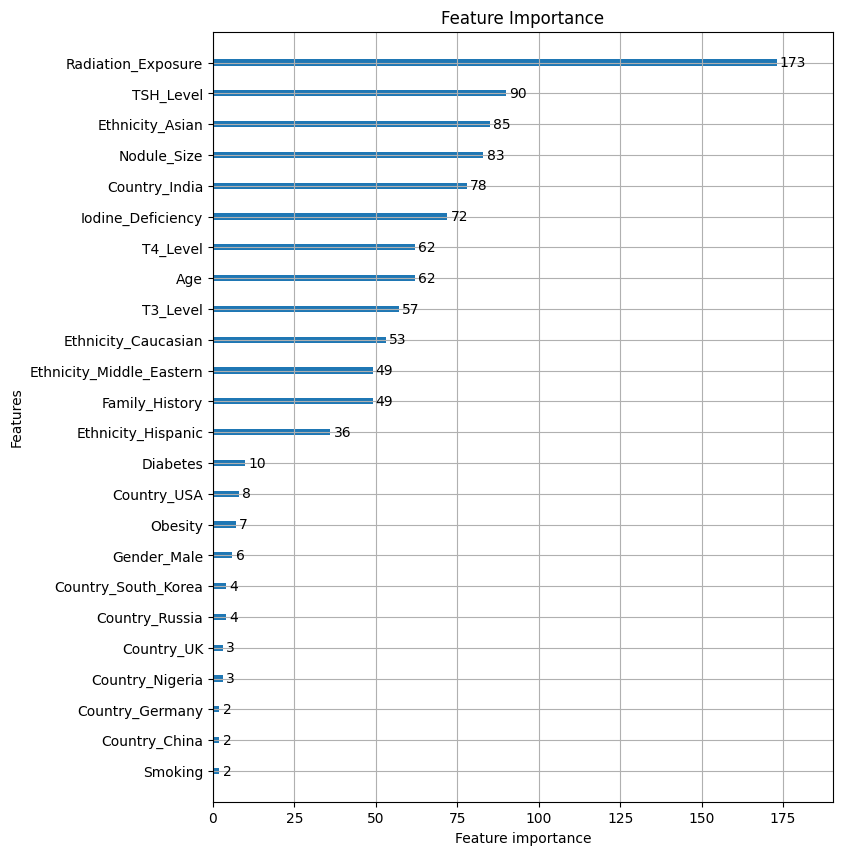

In [90]:
lgb.plot_importance(bst, figsize=(8, 10))
plt.title("Feature Importance")
plt.show()

In [64]:
precision = precision_score(y_test, y_pred_binary)
print(f"De los positivos, son positivos un: {precision}")

De los positivos, son positivos un: 0.7015064451001708
